In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np
import scipy as sp
from numpy.linalg import pinv
from numpy.random import randint, normal
from networkx.algorithms.clique import find_cliques, enumerate_all_cliques, make_max_clique_graph, graph_number_of_cliques
from networkx.algorithms.matching import maximal_matching
from networkx.algorithms.operators.unary import complement
from networkx.generators.random_graphs import erdos_renyi_graph #CHANGE THIS IMPORT TO INCLUDE OTHER GRAPH TYPES
from networkx.linalg.algebraicconnectivity import algebraic_connectivity
from scipy import stats
import itertools as it
from collections import Counter
import pickle

In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))
import block_RK as ac

In [4]:
# Adjust plot size
plt.rcParams["figure.figsize"] = (8, 8)

# ER Experiments

### experimental set-up

In [5]:
# Initialize Graph
n = 200
p = 0.4
G = erdos_renyi_graph(n, p)
m = len(G.edges())

In [6]:
# Initialize Incidence Matrix
A = nx.linalg.graphmatrix.incidence_matrix(G)
A = sp.sparse.csr_matrix.todense(A).transpose()
# their incidence matrix is binary, we need to convert one of the ones to a -1
for i in range(np.shape(A)[0]):
    negindex = np.where(A[i,:] == 1)
    A[i,negindex[1][0]] = -1

In [7]:
# Fix x, b
# Secret initial vector x
x = np.random.rand(n,1)
# Zero Vector b
b = np.zeros((m,1))
# Find mean of x
xbar = np.mean(x)
# Create solution vector (vector with just xbar as values)
sol = np.full((n,1), xbar)

### Path gossip

In [8]:
# Path Gossip with l = 100
N = 300
l = 10
paths, testx, x_list, errs = ac.blockRK_path(A, G, sol, b, N, x, l)
with open("errors/path_p04.txt", "wb") as fp:
    pickle.dump(errs, fp)

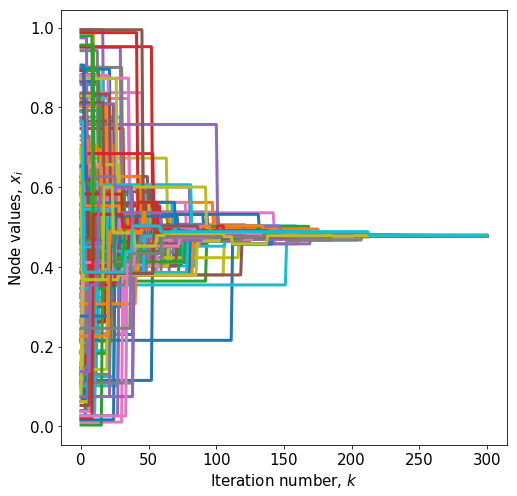

In [9]:
ac.collapse_plt(x_list, n, N)
plt.show()
plt.savefig("plots/ER_p04_path_collapse.svg", format='svg')

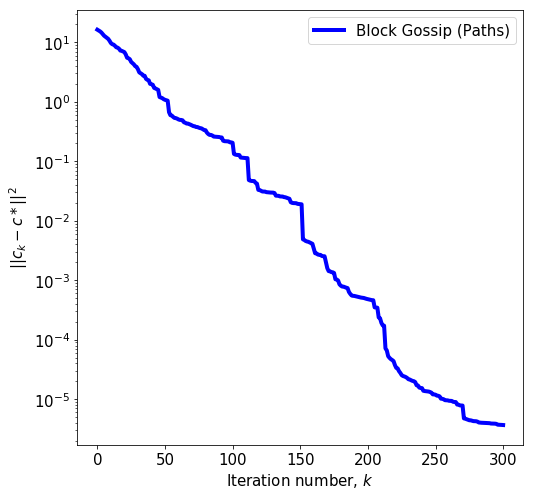

In [10]:
plt.semilogy(range(len(errs)), errs, 'b', linewidth=4, label = 'Block Gossip (Paths)')
plt.legend(prop={'size': 15})
plt.xlabel('Iteration number, $k$', fontsize=15)
plt.ylabel(r'$||c_k-c*||^2$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("plots/ER_p04_path_error.svg", format='svg')

### IES gossip

In [11]:
N = 200
ies = ac.blocks_from_ies(G, A)
test_x, xlist, errs1 = ac.blockRK(A, sol, b, ies, N, x)
with open("errors/ies_p04.txt", "wb") as fp:
    pickle.dump(errs1, fp)

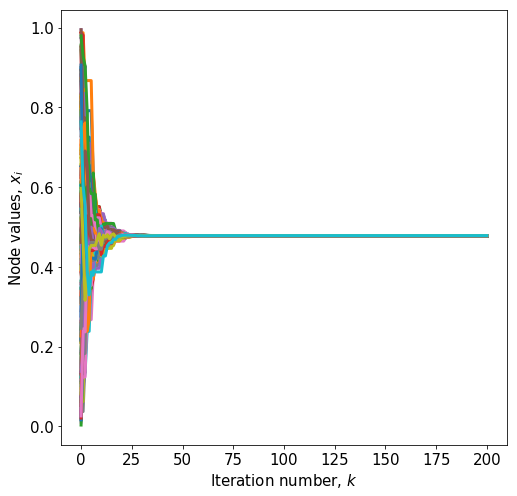

In [12]:
ac.collapse_plt(xlist, n, N)
plt.show()
plt.savefig("plots/ER_p04_ies_collapse.svg", format='svg')

rate calculated!
bound calculated!


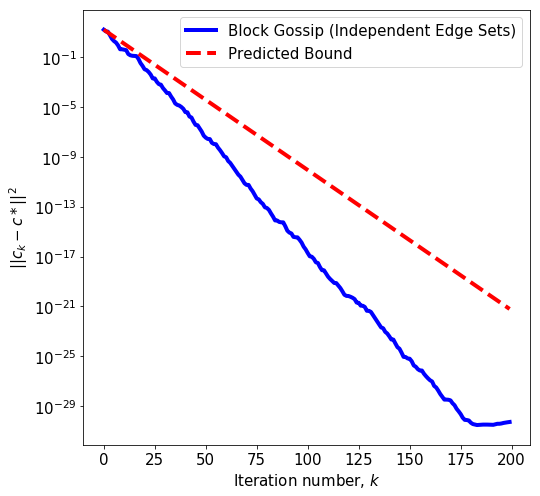

In [12]:
ac.error_plt(errs1, G, ies, sol, N, rate='ies')
plt.show()
plt.savefig("plots/ER_p04_ies_error.svg", format='svg')

### clique gossip

In [13]:
# upper bound
N = 1000
cliques = ac.clique_edge_cover(G, A)
test_x, xlist, errs2 = ac.blockRK(A, sol, b, cliques, N, x)
with open("errors/clique_p04.txt", "wb") as fp:
    pickle.dump(errs2, fp)

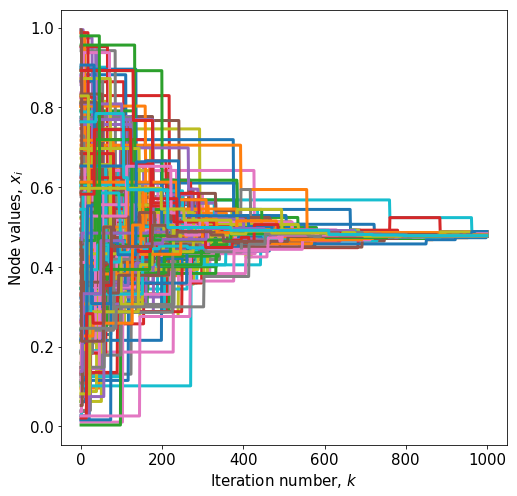

In [14]:
ac.collapse_plt(xlist, n, N)
plt.show()
plt.savefig("plots/ER_p04_clique_collapse.svg", format='svg')

rate calculated!
bound calculated!


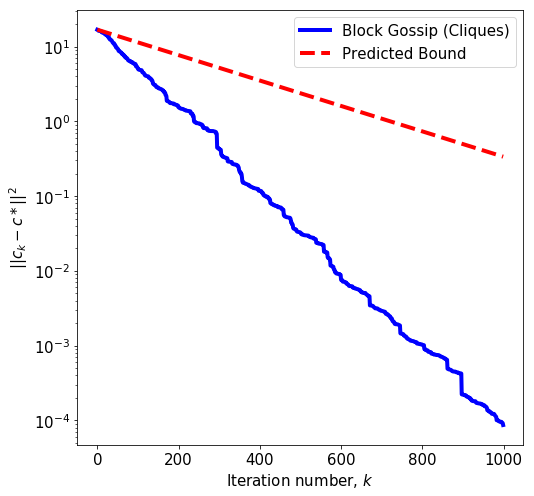

In [18]:
ac.error_plt(errs2, G, cliques, sol, N, rate='cliques')
plt.show()
plt.savefig("plots/ER_p04_clique_error.svg", format='svg')

### randomly selected blocks

In [15]:
N = 200
s = 20
bn = 50
blocks = ac.random_blocks(A, s, bn) # parameters are: incidence matrix, size of blocks, number of blocks
test4, list4, errs3 = ac.blockRK(A, sol, b, blocks, N, x)
with open("errors/ran_p04.txt", "wb") as fp:
    pickle.dump(errs3, fp)

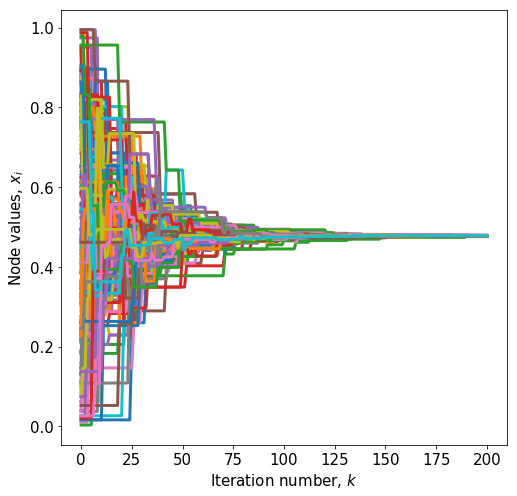

In [16]:
ac.collapse_plt(list4, n, N)
plt.show()
plt.savefig("plots/ER_p04_arbi_collapse.svg", format='svg')

rate calculated!
bound calculated!


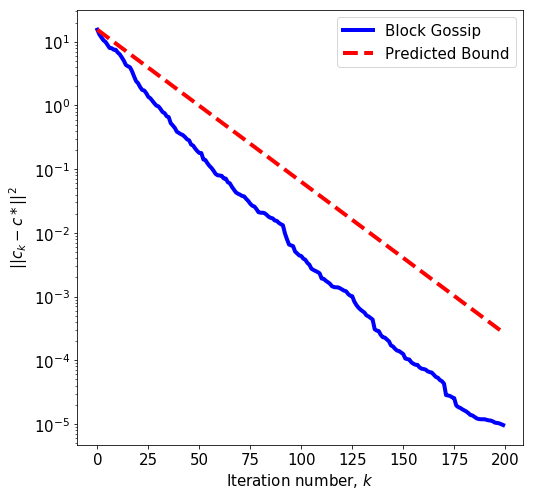

In [21]:
bound, r, sq = ac.error_plt(errs3, G, blocks, sol, N, rate='arbi')
plt.show()
plt.savefig("plots/ER_p04_arbi_error.svg", format='svg')

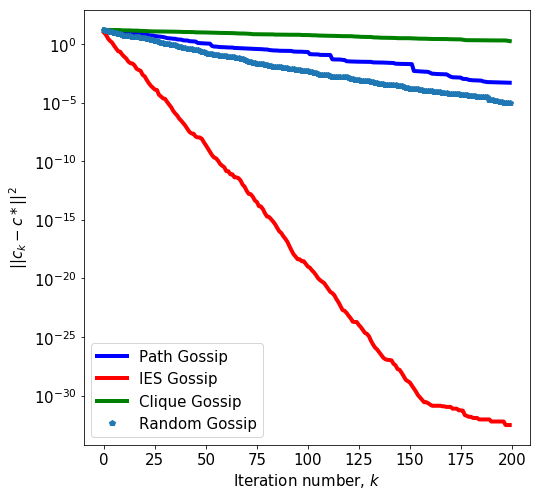

In [17]:
plt.semilogy(range(200), errs[:200], 'b', linewidth=4, label = r'Path Gossip')
plt.semilogy(range(200), errs1[:200], 'r', linewidth=4, label = r'IES Gossip')
plt.semilogy(range(200), errs2[:200], 'g', linewidth=4, label = r'Clique Gossip')
plt.semilogy(range(200), errs3[:200], 'p', linewidth=4, label = r'Random Gossip')
plt.legend(prop={'size': 15})
plt.xlabel('Iteration number, $k$', fontsize=15)
plt.ylabel(r'$||c_k-c*||^2$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.savefig("plots/ER_p04_comparison.svg", format='svg')